In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

#seed set
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("C:/sourceTree/DataScience/ICT/Py_Project/20201207-day36/housing.csv",delim_whitespace=True, header=None)
#1행의 셀에 해당 정보를 모두 입력하기에  화이트 스페스로 구분할 수 있따.
#이번에는 속성에 대한 알려주는 정보가 없어 파악도 쉽지않지.(한 마디로 클래스로 별도 구분이 없어서 어느게 결과인지 아는게 쉽지않다)

In [2]:
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=seed)

In [3]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) #소프트맥스 등을 활용 않는 이유는
#선형회귀 데이터는 참과 거짓을 구분할 필요가 없기에 활성화 함수를 지정할 필요가 없게 된 것이다.

In [4]:
#학습 자동 중단 설정
#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)
#monitor = 'val_loss' :val_loss의 값을 기준으로 해서 멈춤여부를 정하겠어.(횟수는 patience에서 설정)
# patience=100 : 100번까지는 오차가 줄지 않아도 봐줄게. 하지만 101번 째에도 오차가 안줄면 학습을 멈출거야!

#모델 저장 조건 설정.
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

#모델 저장조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5" #파일저장경로 & 저장형식까지 설정.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)

In [5]:
model.compile(loss='mean_squared_error', optimizer='adam')

#모델 실행
history = model.fit(X, Y, validation_split=0.2, epochs=350, batch_size=50, callbacks=[early_stopping_callback, checkpointer]) 

Epoch 1/350
1/9 [==>...........................] - ETA: 0s - loss: 20075.7129
Epoch 00001: val_loss improved from inf to 21044.97461, saving model to ./model\01-21044.9746.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 14840.7861 - val_loss: 21044.9746
Epoch 2/350
1/9 [==>...........................] - ETA: 0s - loss: 11118.5195
Epoch 00002: val_loss improved from 21044.97461 to 11204.12012, saving model to ./model\02-11204.1201.hdf5
9/9 [==============================] - 0s 5ms/step - loss: 7743.0039 - val_loss: 11204.1201
Epoch 3/350
1/9 [==>...........................] - ETA: 0s - loss: 4749.2642
Epoch 00003: val_loss improved from 11204.12012 to 5343.80225, saving model to ./model\03-5343.8022.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 3503.3621 - val_loss: 5343.8022
Epoch 4/350
1/9 [==>...........................] - ETA: 0s - loss: 2465.5771
Epoch 00004: val_loss improved from 5343.80225 to 2470.31812, saving model to ./model\04-2470.3181.hdf

1/9 [==>...........................] - ETA: 0s - loss: 92.1962
Epoch 00034: val_loss did not improve from 94.06183
9/9 [==============================] - 0s 3ms/step - loss: 115.7062 - val_loss: 149.5194
Epoch 35/350
1/9 [==>...........................] - ETA: 0s - loss: 117.9854
Epoch 00035: val_loss did not improve from 94.06183
9/9 [==============================] - 0s 2ms/step - loss: 114.6038 - val_loss: 149.3768
Epoch 36/350
1/9 [==>...........................] - ETA: 0s - loss: 120.9997
Epoch 00036: val_loss did not improve from 94.06183
9/9 [==============================] - 0s 2ms/step - loss: 113.4809 - val_loss: 143.6733
Epoch 37/350
1/9 [==>...........................] - ETA: 0s - loss: 140.4962
Epoch 00037: val_loss did not improve from 94.06183
9/9 [==============================] - 0s 2ms/step - loss: 112.3887 - val_loss: 136.3290
Epoch 38/350
1/9 [==>...........................] - ETA: 0s - loss: 126.7691
Epoch 00038: val_loss did not improve from 94.06183
9/9 [========

Epoch 70/350
1/9 [==>...........................] - ETA: 0s - loss: 101.5563
Epoch 00070: val_loss did not improve from 70.53646
9/9 [==============================] - 0s 2ms/step - loss: 87.6795 - val_loss: 72.2009
Epoch 71/350
1/9 [==>...........................] - ETA: 0s - loss: 93.9519
Epoch 00071: val_loss improved from 70.53646 to 69.99386, saving model to ./model\71-69.9939.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 87.2499 - val_loss: 69.9939
Epoch 72/350
1/9 [==>...........................] - ETA: 0s - loss: 95.4365
Epoch 00072: val_loss improved from 69.99386 to 67.17596, saving model to ./model\72-67.1760.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 86.6551 - val_loss: 67.1760
Epoch 73/350
1/9 [==>...........................] - ETA: 0s - loss: 82.9797
Epoch 00073: val_loss improved from 67.17596 to 63.84593, saving model to ./model\73-63.8459.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 86.2328 - val_loss: 63.8459
E

Epoch 103/350
1/9 [==>...........................] - ETA: 0s - loss: 104.9399
Epoch 00103: val_loss improved from 38.63509 to 37.39895, saving model to ./model\103-37.3990.hdf5
9/9 [==============================] - 0s 5ms/step - loss: 76.2267 - val_loss: 37.3990
Epoch 104/350
1/9 [==>...........................] - ETA: 0s - loss: 62.2638
Epoch 00104: val_loss improved from 37.39895 to 37.31260, saving model to ./model\104-37.3126.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 76.0799 - val_loss: 37.3126
Epoch 105/350
1/9 [==>...........................] - ETA: 0s - loss: 103.8762
Epoch 00105: val_loss improved from 37.31260 to 36.69629, saving model to ./model\105-36.6963.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 75.7948 - val_loss: 36.6963
Epoch 106/350
1/9 [==>...........................] - ETA: 0s - loss: 94.7683
Epoch 00106: val_loss improved from 36.69629 to 36.36273, saving model to ./model\106-36.3627.hdf5
9/9 [============================

Epoch 136/350
1/9 [==>...........................] - ETA: 0s - loss: 59.4376
Epoch 00136: val_loss improved from 26.12547 to 25.09218, saving model to ./model\136-25.0922.hdf5
9/9 [==============================] - 0s 4ms/step - loss: 70.3207 - val_loss: 25.0922
Epoch 137/350
1/9 [==>...........................] - ETA: 0s - loss: 79.5065
Epoch 00137: val_loss improved from 25.09218 to 24.96360, saving model to ./model\137-24.9636.hdf5
9/9 [==============================] - 0s 5ms/step - loss: 70.2948 - val_loss: 24.9636
Epoch 138/350
1/9 [==>...........................] - ETA: 0s - loss: 100.8882
Epoch 00138: val_loss did not improve from 24.96360
9/9 [==============================] - 0s 2ms/step - loss: 70.2026 - val_loss: 25.5538
Epoch 139/350
1/9 [==>...........................] - ETA: 0s - loss: 89.0216
Epoch 00139: val_loss did not improve from 24.96360
9/9 [==============================] - 0s 2ms/step - loss: 70.0230 - val_loss: 25.7879
Epoch 140/350
1/9 [==>...................

1/9 [==>...........................] - ETA: 0s - loss: 53.5151
Epoch 00171: val_loss did not improve from 21.43289
9/9 [==============================] - 0s 2ms/step - loss: 65.9610 - val_loss: 22.3644
Epoch 172/350
1/9 [==>...........................] - ETA: 0s - loss: 72.4353
Epoch 00172: val_loss did not improve from 21.43289
9/9 [==============================] - 0s 3ms/step - loss: 65.8698 - val_loss: 22.4158
Epoch 173/350
1/9 [==>...........................] - ETA: 0s - loss: 97.0023
Epoch 00173: val_loss did not improve from 21.43289
9/9 [==============================] - 0s 2ms/step - loss: 66.1048 - val_loss: 24.9699
Epoch 174/350
1/9 [==>...........................] - ETA: 0s - loss: 78.3339
Epoch 00174: val_loss did not improve from 21.43289
9/9 [==============================] - 0s 2ms/step - loss: 65.8260 - val_loss: 22.8007
Epoch 175/350
1/9 [==>...........................] - ETA: 0s - loss: 42.5526
Epoch 00175: val_loss improved from 21.43289 to 20.63660, saving model to

1/9 [==>...........................] - ETA: 0s - loss: 51.6111
Epoch 00208: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 61.5792 - val_loss: 23.0315
Epoch 209/350
1/9 [==>...........................] - ETA: 0s - loss: 42.9607
Epoch 00209: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 61.7569 - val_loss: 22.8218
Epoch 210/350
1/9 [==>...........................] - ETA: 0s - loss: 68.6970
Epoch 00210: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 3ms/step - loss: 61.4460 - val_loss: 23.6839
Epoch 211/350
1/9 [==>...........................] - ETA: 0s - loss: 25.8888
Epoch 00211: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 60.9727 - val_loss: 28.6854
Epoch 212/350
1/9 [==>...........................] - ETA: 0s - loss: 47.6103
Epoch 00212: val_loss did not improve from 20.11226
9/9 [================

Epoch 246/350
1/9 [==>...........................] - ETA: 0s - loss: 47.7879
Epoch 00246: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 56.4631 - val_loss: 34.5875
Epoch 247/350
1/9 [==>...........................] - ETA: 0s - loss: 88.0704
Epoch 00247: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 56.8994 - val_loss: 37.7682
Epoch 248/350
1/9 [==>...........................] - ETA: 0s - loss: 69.4401
Epoch 00248: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 56.2133 - val_loss: 41.2330
Epoch 249/350
1/9 [==>...........................] - ETA: 0s - loss: 64.7962
Epoch 00249: val_loss did not improve from 20.11226
9/9 [==============================] - 0s 2ms/step - loss: 55.9373 - val_loss: 44.9159
Epoch 250/350
1/9 [==>...........................] - ETA: 0s - loss: 48.3808
Epoch 00250: val_loss did not improve from 20.11226
9/9 [==

In [6]:
Y_prediction = model.predict(X_test).flatten()

for i in range(10) :
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격 : 22.600, 예상가격: 21.389
실제가격 : 50.000, 예상가격: 21.158
실제가격 : 23.000, 예상가격: 25.166
실제가격 : 8.300, 예상가격: 14.717
실제가격 : 21.200, 예상가격: 21.266
실제가격 : 19.900, 예상가격: 24.173
실제가격 : 20.600, 예상가격: 22.777
실제가격 : 18.700, 예상가격: 27.663
실제가격 : 16.100, 예상가격: 19.827
실제가격 : 18.600, 예상가격: 15.550


In [7]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,val_loss
278,51.597786,66.136391
279,51.364273,68.380119
280,51.112572,64.243568
281,51.134724,62.184650
282,51.114658,63.348034


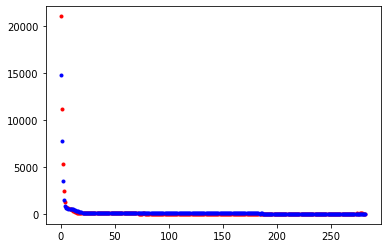

In [8]:
#1교시 그래프로 표현하기 사용 =============================
#y_vloss에 테스트셋으로 실험 결과의 오차값을 저장한다.
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정할 정확도의 값을 저장.
y_loss = history.history['loss']
#x값을 지정하고 정확도는 파란색 / 오차는 빨간색 으로 표현.
x_len = np.arange(len(y_loss)) #x축 길이를 설정하기 위해 실시.
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_loss, "o", c="blue", markersize=3)

plt.show()
    
#모델 실행 및 저장
#model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer]) 